In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('bank_transactions.csv')

In [4]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


df.info() - dataset haqda melumatlar verir \
datatype, nonnull deyerlerin sayi, row-column sayi ve memory usage gosterilir

In [6]:
df.isnull().sum() #null deyerlerimin sayina baxiram

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [7]:
df.nunique()   #columnlarimdaki unique deyerlerin sayina baxiram

TransactionID              1048567
CustomerID                  884265
CustomerDOB                  17254
CustGender                       3
CustLocation                  9355
CustAccountBalance          161328
TransactionDate                 55
TransactionTime              81918
TransactionAmount (INR)      93024
dtype: int64

In [8]:
df.shape    #datasetin shape-ne baxiram

(1048567, 9)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(1041614, 9)

In [11]:
df.duplicated().sum()

0

In [12]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [13]:
df['CustomerAge'] =df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

In [14]:
df.CustGender.value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [15]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)

In [16]:
df.CustGender.value_counts()

CustGender
M    760978
F    280635
Name: count, dtype: int64

In [17]:
df[df["CustomerAge"] <= 0]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.00,-41
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.00,-57
5,T6,C1536588,2072-08-10,F,ITANAGAR,53609.20,2016-02-08,173940,676.00,-56
15,T16,C8334633,2068-10-07,F,NEW DELHI,1283.12,2016-01-08,125725,250.00,-52
30,T31,C7648712,2067-01-21,F,NEW DELHI,298461.05,2016-03-08,160642,500.00,-51
...,...,...,...,...,...,...,...,...,...,...
1048506,T1048507,C3333984,2070-09-20,M,NAVI MUMBAI,41.82,2016-09-18,182310,878.18,-54
1048510,T1048511,C3429427,2048-07-15,M,HOWRAH,416244.74,2016-09-18,184959,1695.00,-32
1048536,T1048537,C2939947,2033-05-10,M,NEW DELHI,92173.35,2016-09-18,184556,1319.04,-17
1048544,T1048545,C3712582,2071-05-10,M,MUMBAI,25414.52,2016-09-18,182015,400.00,-55


In [18]:
df = df[df["CustomerAge"] >= 0]

In [19]:
df[df["CustomerDOB"] == "1800-01-01"]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
16,T17,C1376215,1800-01-01,M,MUMBAI,77495.15,2016-01-08,124727,1423.11,216
22,T23,C7018081,1800-01-01,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,104718,110.00,216
28,T29,C7935438,1800-01-01,M,MOHALI,969436.12,2016-03-08,183634,36.90,216
35,T36,C1211387,1800-01-01,M,AHMEDABAD,11791.25,2016-03-08,125915,1075.00,216
151,T152,C3334638,1800-01-01,M,PUNE,700.00,2016-09-08,24912,1500.00,216
...,...,...,...,...,...,...,...,...,...,...
1048443,T1048444,C7261226,1800-01-01,M,BHILAI,1393.33,2016-09-18,102427,200.00,216
1048452,T1048453,C3813481,1800-01-01,M,NEW DELHI,984605.24,2016-09-18,84644,219.00,216
1048531,T1048532,C6937679,1800-01-01,M,NEW DELHI,50698.90,2016-09-18,184319,598.86,216
1048533,T1048534,C7431884,1800-01-01,M,MANDIR DHANBAD,53771.64,2016-09-18,184049,520.00,216


In [20]:
df = df[df["CustomerDOB"] != "1800-01-01"]

In [21]:
df.shape

(891440, 10)

In [22]:
df[df["CustomerAge"] <18]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
270,T271,C2632615,1999-02-18,M,BAGHPAT,10266.36,2016-10-21,152328,327.0,17
294,T295,C5411869,1999-12-24,M,BARAMATI,7486.12,2016-10-21,151037,1000.0,17
485,T486,C8013820,2004-12-07,F,CHENNAI,6661.03,2016-10-21,215149,110.0,12
734,T735,C1537725,2000-01-13,M,NEW DELHI,854.89,2016-10-21,223056,275.0,16
3696,T3697,C1934386,2002-09-12,M,NEW DELHI,51469.13,2016-10-21,171357,963.0,14
...,...,...,...,...,...,...,...,...,...,...
1046555,T1046556,C9024779,1999-05-21,M,ULHASNAGAR,1017.94,2016-09-18,34406,3000.0,17
1046676,T1046677,C2722682,2001-11-07,F,PATNA,92052.93,2016-09-18,103222,5884.0,15
1047129,T1047130,C2510728,2015-11-18,M,NEW DELHI,267623.36,2016-09-18,202005,5300.0,1
1047639,T1047640,C8042363,1999-02-23,M,BAGHPAT,6017.81,2016-09-18,80808,18999.0,17


In [23]:
df.drop(df[df.CustomerAge<18].index, inplace=True) #18den asagi insanin transaction etmesi legal deyil

In [24]:
df.shape

(889861, 10)

# Vizuallasdirma

In [25]:
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek

In [26]:
df['TransactionMonth'] = df['TransactionDate'].dt.month

In [27]:
df['TransactionYear'] = df['TransactionDate'].dt.year

In [28]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDayOfWeek,TransactionMonth,TransactionYear
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22,0,2,2016
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20,0,2,2016
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28,0,2,2016
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,24,0,2,2016
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,34,0,2,2016


In [29]:
df['TransactionHour'] = (pd.to_datetime(df['TransactionTime'].astype(str), format='%H%M%S', errors='coerce').dt.time).apply(lambda x: x.hour)

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['TransactionHour'].apply(categorize_time_of_day)

In [30]:
df.CustomerAge.describe()

count    889861.000000
mean         28.897962
std           5.307810
min          18.000000
25%          25.000000
50%          28.000000
75%          32.000000
max          42.000000
Name: CustomerAge, dtype: float64

In [31]:
#describe ile statistik melumatlarima baxiram
#count-row sayi
#mean-ededi ortam-mean valuem
#std-standard deviation
#min-minimum deyerim
#25%-Q1- 1st quartile
#50%- Q2- median- 2nd quartile
#75% - Q3 - 3rd quartile
#max-100%-4cu quartile

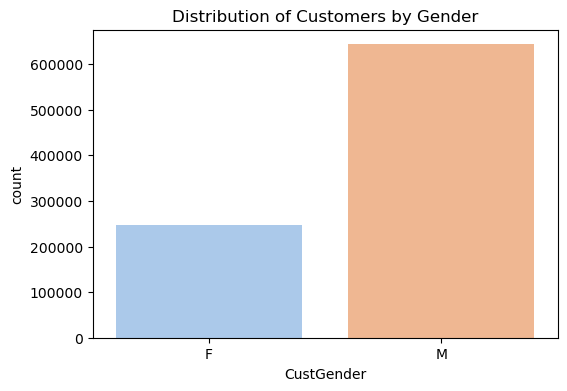

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender',data = df, palette='pastel')
plt.title('Distribution of Customers by Gender')
plt.show()

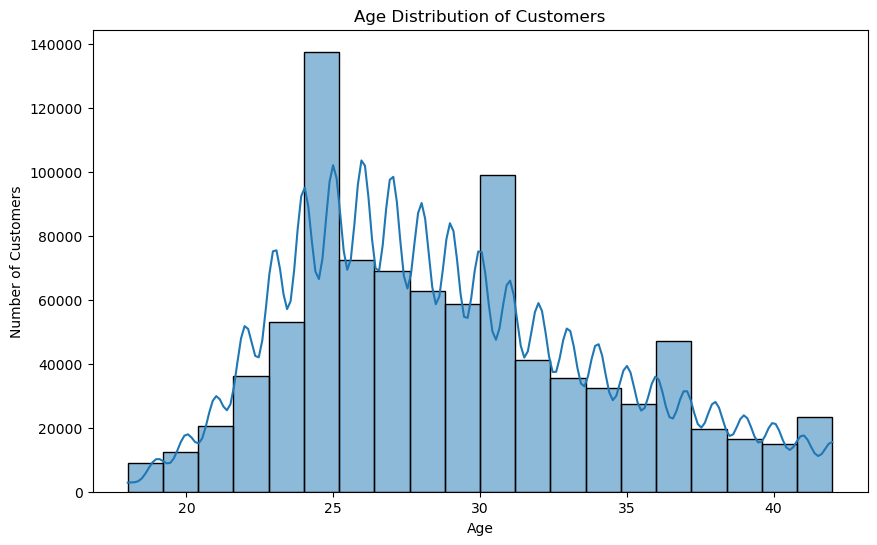

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

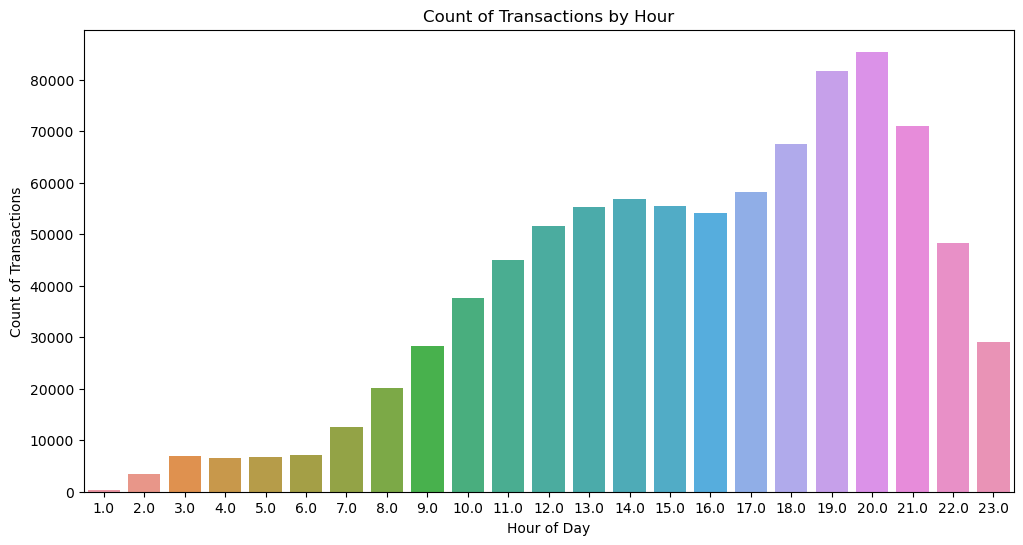

In [34]:
#transactionun saatlara gore sayi
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='TransactionHour')
plt.title('Count of Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Transactions')
plt.show()

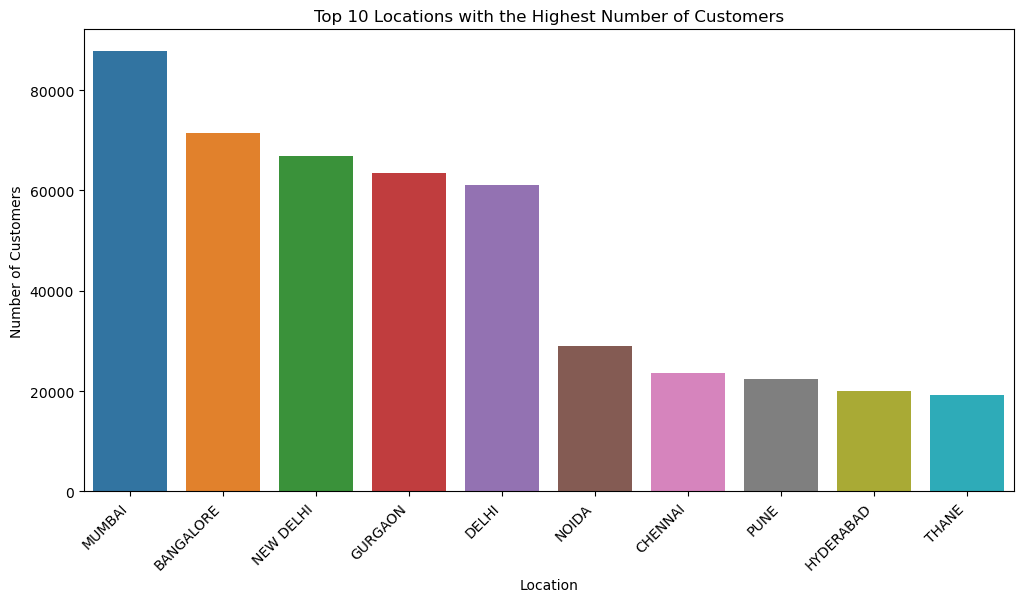

In [35]:
location_counts = df['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
df.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
CustomerAge                         int32
TransactionDayOfWeek                int32
TransactionMonth                    int32
TransactionYear                     int32
TransactionHour                   float64
TimeOfDay                          object
dtype: object

In [37]:
num_col = df.select_dtypes(exclude=['object','datetime64[ns]'])
cat_col = df.select_dtypes(include='object')

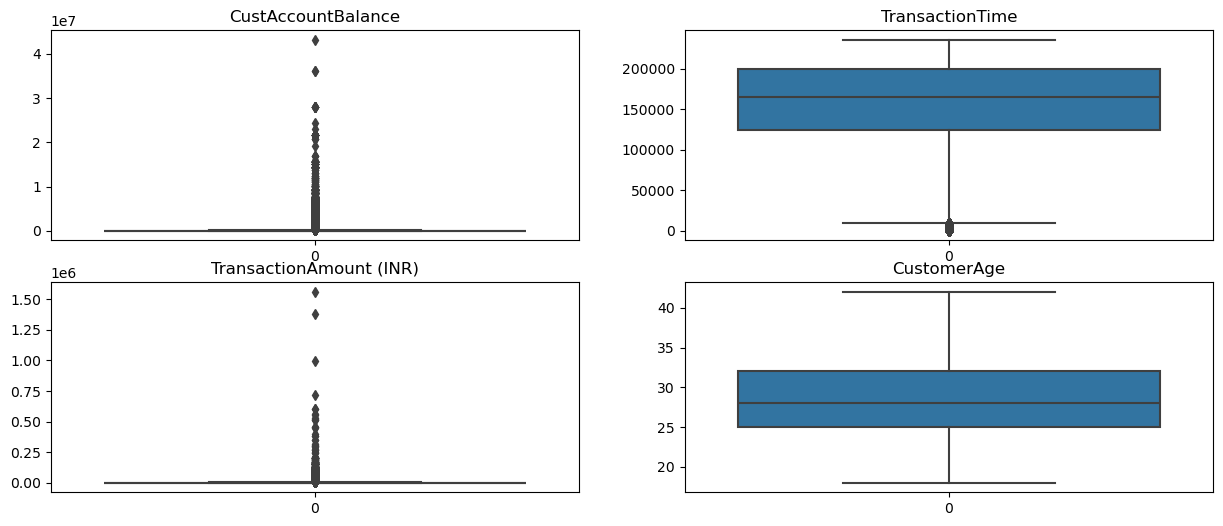

In [39]:
plt.figure(figsize=(15,6))

plt.subplot(221)
plt.title('CustAccountBalance')
sns.boxplot(df.CustAccountBalance)

plt.subplot(222)
plt.title('TransactionTime')
sns.boxplot(df.TransactionTime)

plt.subplot(223)
plt.title('TransactionAmount (INR)')
sns.boxplot(df['TransactionAmount (INR)'])

plt.subplot(224)
plt.title('CustomerAge')
sns.boxplot(df.CustomerAge);

In [40]:
df.shape

(889861, 15)

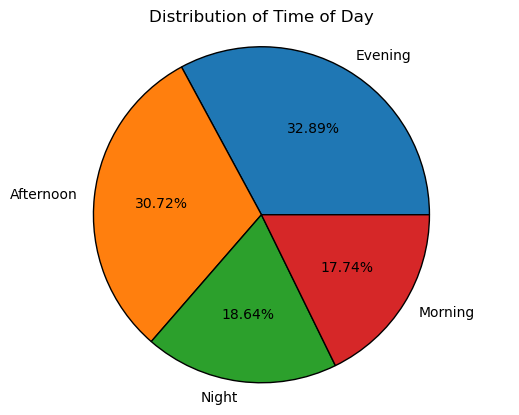

In [41]:
plt.pie(x=df['TimeOfDay'].value_counts().values,
        pctdistance=0.6,
        labels=df['TimeOfDay'].value_counts().index, 
        autopct = '%.2f%%',
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title('Distribution of Time of Day')
plt.axis('equal'); # Ensure the pie chart is a circle (equal aspect ratio)

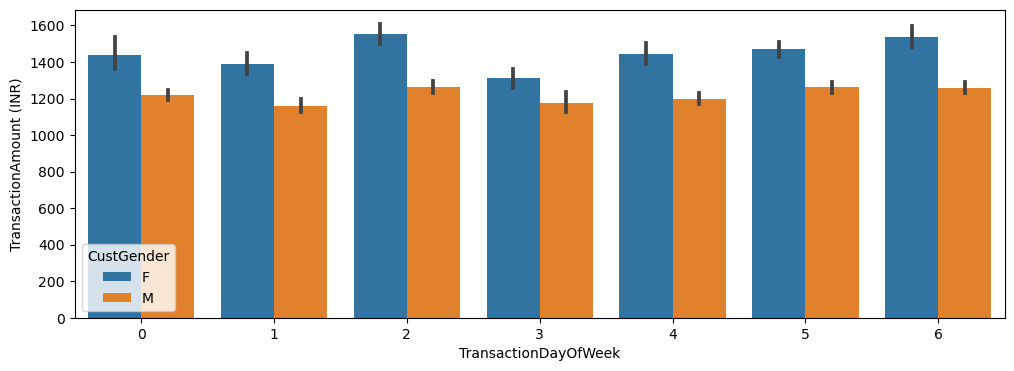

In [42]:
plt.figure(figsize=(12,4))
sns.barplot(x = "TransactionDayOfWeek", y="TransactionAmount (INR)", data = df, estimator = "mean" , hue = "CustGender", dodge = True)
plt.show()

In [43]:
#her gunum ucun female olanlarin transactionu daha coxdur

In [44]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,TransactionDayOfWeek,TransactionMonth,TransactionYear,TransactionHour,TimeOfDay
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22,0,2,2016,14.0,Afternoon
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20,0,2,2016,14.0,Afternoon
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28,0,2,2016,18.0,Evening
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,24,0,2,2016,17.0,Evening
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,34,0,2,2016,17.0,Evening


In [45]:
# df.drop(columns=['TransactionDayOfWeek','TransactionMonth','TransactionHour'],axis=1,inplace=True) #elave yaratdiqlarimi silirem

In [46]:
#df.drop('TimeOfDay',axis=1,inplace=True) - encode edib isletmeyi yoxlayacam

In [47]:
#dbscan - check edersen

# RFM Analyze

In [67]:
df['TransactionDate_min']=df['TransactionDate']
df['TransactionDate_max']=df['TransactionDate']
df_RFM = df.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionAmount (INR)" : "mean",
                                        "CustomerAge" : "max",
                                        "TransactionDate_max":"max",
                                        "TransactionDate_min":"min",
                                        "TransactionDate":"median"
                        })

df_RFM = df_RFM.reset_index()

In [68]:
df_RFM

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate_max,TransactionDate_min,TransactionDate
0,C1010011,2,F,NOIDA,76340.635,2553.0,33,2016-09-26,2016-09-08,2016-09-17
1,C1010012,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,100112.950,727.5,32,2016-07-08,2016-01-08,2016-04-08
3,C1010018,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,2016-09-15
4,C1010028,1,F,DELHI,296828.370,557.0,28,2016-08-29,2016-08-29,2016-08-29
...,...,...,...,...,...,...,...,...,...,...
768960,C9099836,1,M,BHIWANDI,133067.230,691.0,26,2016-07-08,2016-07-08,2016-07-08
768961,C9099877,1,M,BANGALORE,96063.460,222.0,20,2016-09-15,2016-09-15,2016-09-15
768962,C9099919,1,M,GUNTUR,5559.750,126.0,23,2016-08-18,2016-08-18,2016-08-18
768963,C9099941,1,M,CHENNAI,35295.920,50.0,21,2016-08-28,2016-08-28,2016-08-28


In [69]:
df_RFM.drop('CustomerID',axis=1,inplace=True)

In [70]:
df_RFM.rename(columns={"TransactionID":"Frequency"},inplace=True)

In [71]:
df_RFM['TransactionDate_max'].max()

Timestamp('2016-12-09 00:00:00')

In [72]:
# Assume 'TransactionDate_max' is the reference date (most recent date in the dataset)
reference_date = df_RFM['TransactionDate_max'].max()
# Calculate Recency as the number of days from each customer's last transaction to the reference date
df_RFM['Recency'] = (reference_date - df_RFM['TransactionDate_max']).dt.days

In [74]:
df_RFM[df_RFM['Recency']==0]

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate_max,TransactionDate_min,TransactionDate,Recency
73,1,F,BENGALURU,53996.33,426.7,34,2016-12-09,2016-12-09,2016-12-09 00:00:00,0
91,1,M,JODHPUR,11233.35,235.0,27,2016-12-09,2016-12-09,2016-12-09 00:00:00,0
94,1,F,BENGALURU,53996.33,378.8,34,2016-12-09,2016-12-09,2016-12-09 00:00:00,0
108,1,M,NEW DELHI,5488.02,108.0,31,2016-12-09,2016-12-09,2016-12-09 00:00:00,0
115,1,M,ALAPPUZHA,10717.02,50.0,28,2016-12-09,2016-12-09,2016-12-09 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...
768531,1,M,GURGAON,95652.12,2000.0,26,2016-12-09,2016-12-09,2016-12-09 00:00:00,0
768618,1,M,KOTA,3052.08,8.0,24,2016-12-09,2016-12-09,2016-12-09 00:00:00,0
768652,1,F,BANGALORE,57791.69,491.0,31,2016-12-09,2016-12-09,2016-12-09 00:00:00,0
768755,2,M,NEW DELHI,2774363.38,2349.0,32,2016-12-09,2016-08-22,2016-10-15 12:00:00,0


In [75]:
def replace_zeros(i):
    if i==0:
        return 1
    else:
        return i
df_RFM['Recency']=df_RFM['Recency'].apply(replace_zeros)

In [76]:
df_RFM.drop(columns=["TransactionDate_min","TransactionDate_max"],inplace=True)

In [77]:
df_RFM

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDate,Recency
0,2,F,NOIDA,76340.635,2553.0,33,2016-09-17,74
1,1,M,MUMBAI,24204.490,1499.0,22,2016-08-14,117
2,2,F,MUMBAI,100112.950,727.5,32,2016-04-08,154
3,1,F,CHAMPARAN,496.180,30.0,26,2016-09-15,85
4,1,F,DELHI,296828.370,557.0,28,2016-08-29,102
...,...,...,...,...,...,...,...,...
768960,1,M,BHIWANDI,133067.230,691.0,26,2016-07-08,154
768961,1,M,BANGALORE,96063.460,222.0,20,2016-09-15,85
768962,1,M,GUNTUR,5559.750,126.0,23,2016-08-18,113
768963,1,M,CHENNAI,35295.920,50.0,21,2016-08-28,103


In [78]:
df_RFM.dtypes

Frequency                           int64
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionAmount (INR)           float64
CustomerAge                         int32
TransactionDate            datetime64[ns]
Recency                             int64
dtype: object

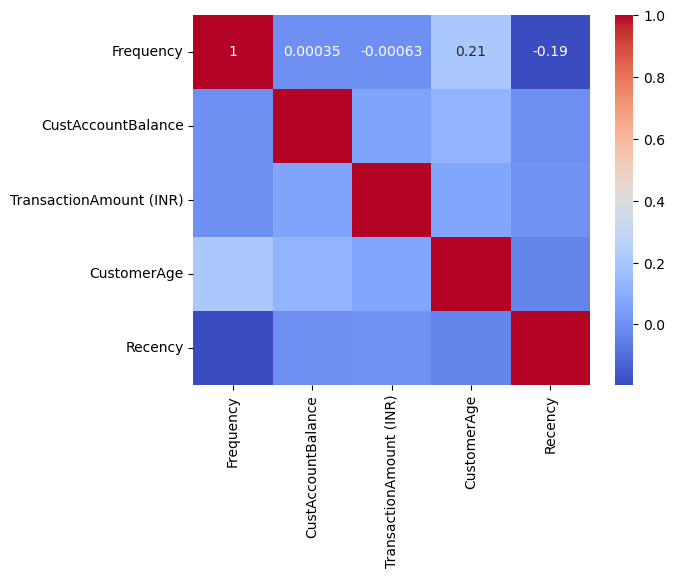

In [79]:
sns.heatmap(df_RFM.corr(numeric_only=True),annot=True,cmap='coolwarm');

In [81]:
df_RFM['CustGender']=df_RFM['CustGender'].map({'M':1,'F':0})

In [82]:
df_RFM = df_RFM.rename(columns={"TransactionAmount (INR)" : "TransactionAmount"})

In [83]:
df_RFM

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionAmount,CustomerAge,TransactionDate,Recency
0,2,0,NOIDA,76340.635,2553.0,33,2016-09-17,74
1,1,1,MUMBAI,24204.490,1499.0,22,2016-08-14,117
2,2,0,MUMBAI,100112.950,727.5,32,2016-04-08,154
3,1,0,CHAMPARAN,496.180,30.0,26,2016-09-15,85
4,1,0,DELHI,296828.370,557.0,28,2016-08-29,102
...,...,...,...,...,...,...,...,...
768960,1,1,BHIWANDI,133067.230,691.0,26,2016-07-08,154
768961,1,1,BANGALORE,96063.460,222.0,20,2016-09-15,85
768962,1,1,GUNTUR,5559.750,126.0,23,2016-08-18,113
768963,1,1,CHENNAI,35295.920,50.0,21,2016-08-28,103


In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_RFM.drop('CustLocation',axis=1,inplace=True)
df_RFM.drop('TransactionDate',axis=1,inplace=True)
df_scaled=scaler.fit_transform(df_RFM)
df_scaled=pd.DataFrame(df_scaled,columns=df_RFM.columns)

In [85]:
df_RFM

,Frequency,CustGender,CustAccountBalance,TransactionAmount,CustomerAge,Recency
0,2,0,76340.635,2553.0,33,74
1,1,1,24204.490,1499.0,22,117
2,2,0,100112.950,727.5,32,154
3,1,0,496.180,30.0,26,85
4,1,0,296828.370,557.0,28,102
...,...,...,...,...,...,...
768960,1,1,133067.230,691.0,26,154
768961,1,1,96063.460,222.0,20,85
768962,1,1,5559.750,126.0,23,113
768963,1,1,35295.920,50.0,21,103


In [116]:
df_pca=df_scaled.copy()   #PCA isledib kmeans yoxlayacam
df2=df_scaled.copy()      #outlierleri cixarib kmeans yoxlayacam
df3=df_scaled.copy()      #dbscan/hierarchical clustering yoxlayacam

In [87]:
#df_RFM ile kmeans

In [88]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [89]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

In [90]:
wcss

[4613789.999999992,
 3841342.9024750167,
 3199958.564481459,
 2798792.753039154,
 2399591.3520946046,
 2122903.3187404196,
 1857291.1613505492,
 1656598.4909278268,
 1548772.488358683]

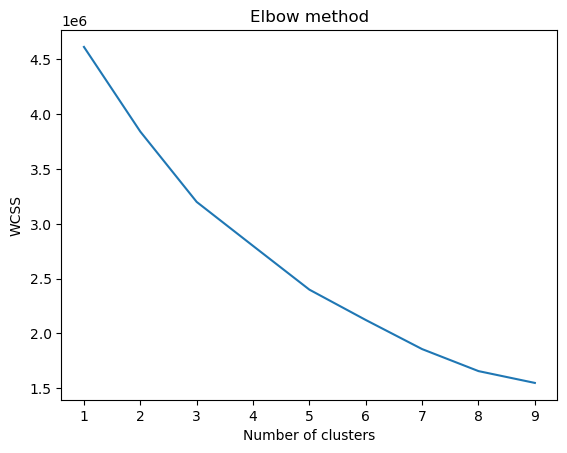

In [91]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [92]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans_labels = kmeans.fit_predict(df_scaled)

In [93]:
from sklearn.metrics import silhouette_score

In [94]:
#sample sec
#3d visual
#k=3

In [79]:
silhouette_kmeans = silhouette_score(df_scaled.head(100000), kmeans_labels[:100000])
silhouette_kmeans

0.35849115646968255

In [95]:
from sklearn.decomposition import PCA

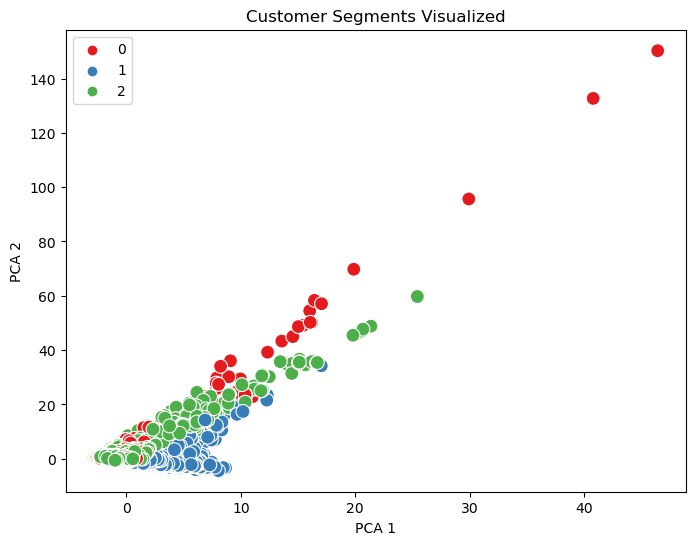

In [96]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='Set1', s=100)
plt.title('Customer Segments Visualized')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [97]:
#outlierleri cixaraq

In [98]:
df2=df_RFM.copy()

In [99]:
df2

,Frequency,CustGender,CustAccountBalance,TransactionAmount,CustomerAge,Recency
0,2,0,76340.635,2553.0,33,74
1,1,1,24204.490,1499.0,22,117
2,2,0,100112.950,727.5,32,154
3,1,0,496.180,30.0,26,85
4,1,0,296828.370,557.0,28,102
...,...,...,...,...,...,...
768960,1,1,133067.230,691.0,26,154
768961,1,1,96063.460,222.0,20,85
768962,1,1,5559.750,126.0,23,113
768963,1,1,35295.920,50.0,21,103


In [118]:
# Outlier Handling using IQR method - Deleting Outliers
def delete_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the data to keep only the rows within the bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

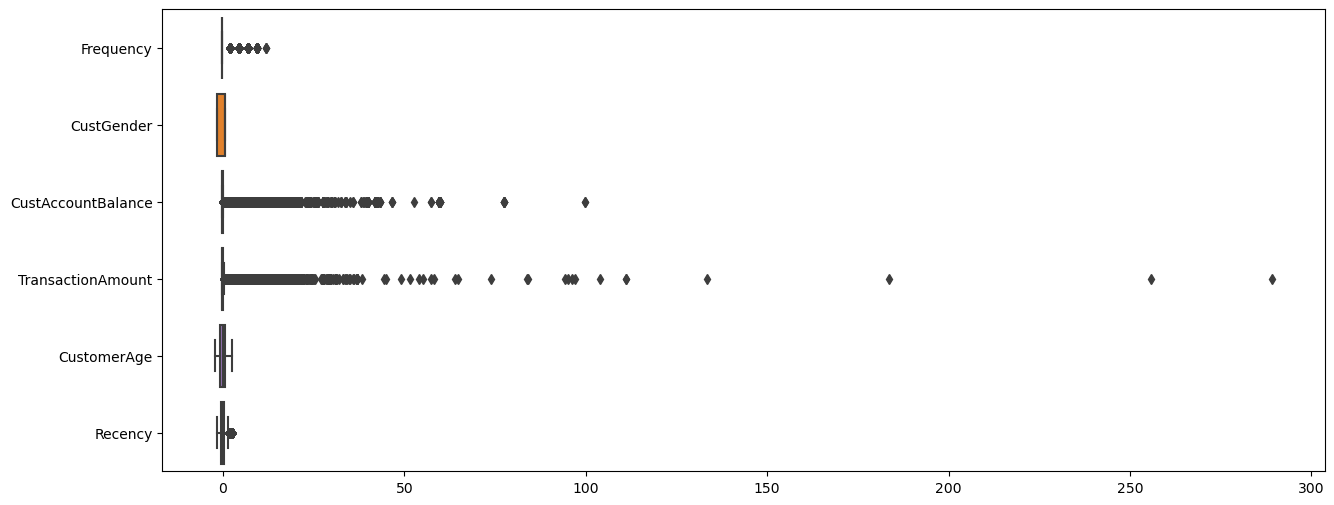

In [119]:
plt.figure(figsize=(15,6))
sns.boxplot(df2,orient='h');

In [120]:
df2=delete_outliers_iqr(df2,df2.columns)

In [121]:
df2.dropna(inplace=True)

In [122]:
df2 = df2.reset_index()

In [123]:
df2

,index,Frequency,CustGender,CustAccountBalance,TransactionAmount,CustomerAge,Recency
0,1,-0.381873,0.619278,-0.153000,0.039713,-1.367481,-0.163877
1,3,-0.381873,-1.614782,-0.218734,-0.232835,-0.622392,-0.560583
2,9,-0.381873,-1.614782,-0.216531,-0.219848,-0.994936,0.282418
3,12,-0.381873,0.619278,-0.200558,-0.201109,-0.063576,-0.213465
4,14,-0.381873,-1.614782,-0.219771,-0.192389,-0.249848,-0.151480
...,...,...,...,...,...,...,...
458626,768959,-0.381873,0.619278,-0.195843,-0.128937,0.495240,-0.362230
458627,768961,-0.381873,0.619278,0.046236,-0.197213,-1.740025,-0.560583
458628,768962,-0.381873,0.619278,-0.204695,-0.215024,-1.181208,-0.213465
458629,768963,-0.381873,0.619278,-0.122248,-0.229124,-1.553753,-0.337436


In [124]:
df2.drop('index',axis=1,inplace=True)

In [125]:
df2=scaler.fit_transform(df2)

In [126]:
df2

array([[-1.11022302e-16,  6.00516478e-01,  1.47454657e-01,
         1.89088089e+00, -1.23516472e+00,  9.67858231e-02],
       [-1.11022302e-16, -1.66523324e+00, -8.06031921e-01,
        -8.90552523e-01, -4.58194608e-01, -4.86957333e-01],
       [-1.11022302e-16, -1.66523324e+00, -7.74075979e-01,
        -7.58013150e-01, -8.46679666e-01,  7.53496874e-01],
       ...,
       [-1.11022302e-16,  6.00516478e-01, -6.02388303e-01,
        -7.08784240e-01, -1.04092220e+00,  2.38179286e-02],
       [-1.11022302e-16,  6.00516478e-01,  5.93523130e-01,
        -8.52684131e-01, -1.42940725e+00, -1.58601808e-01],
       [-1.11022302e-16,  6.00516478e-01, -5.45714747e-01,
         6.71518657e-01,  1.09574562e+00, -6.69377070e-01]])

In [127]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

In [128]:
wcss

[2293154.9999999995,
 1827440.066404333,
 1518364.7052465044,
 1312291.7775599821,
 1138456.3046773851,
 989832.4398977319,
 924218.0682173606,
 876792.4611280458,
 822470.1164349339]

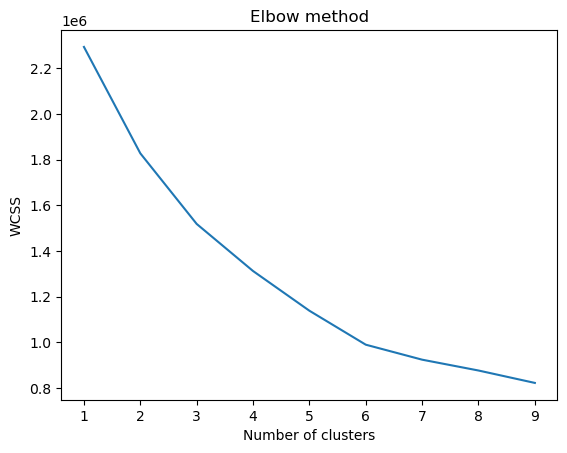

In [129]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [130]:
kmeans3 = KMeans(n_clusters = 3, random_state = 42)
y_kmeans3 = kmeans3.fit_predict(df2)

In [131]:
df2=pd.DataFrame(df2)

In [132]:
silhouette_kmeans = silhouette_score(df2.head(100000), y_kmeans3[:100000])
silhouette_kmeans

0.27595335804474974

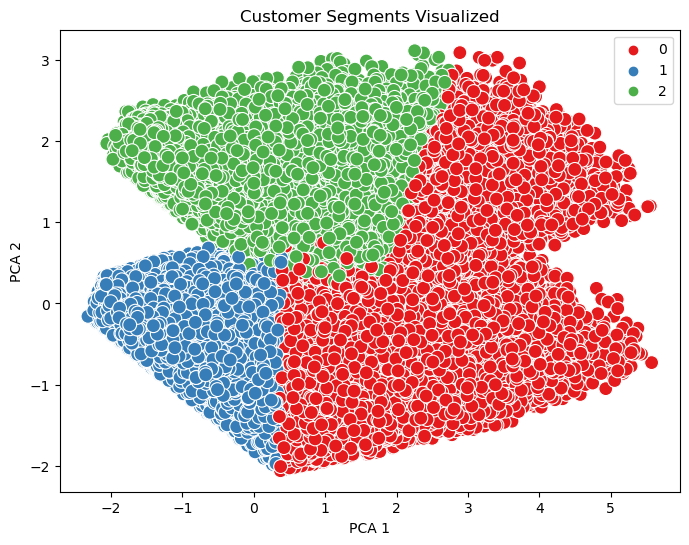

In [133]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=y_kmeans3, palette='Set1', s=100)
plt.title('Customer Segments Visualized')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

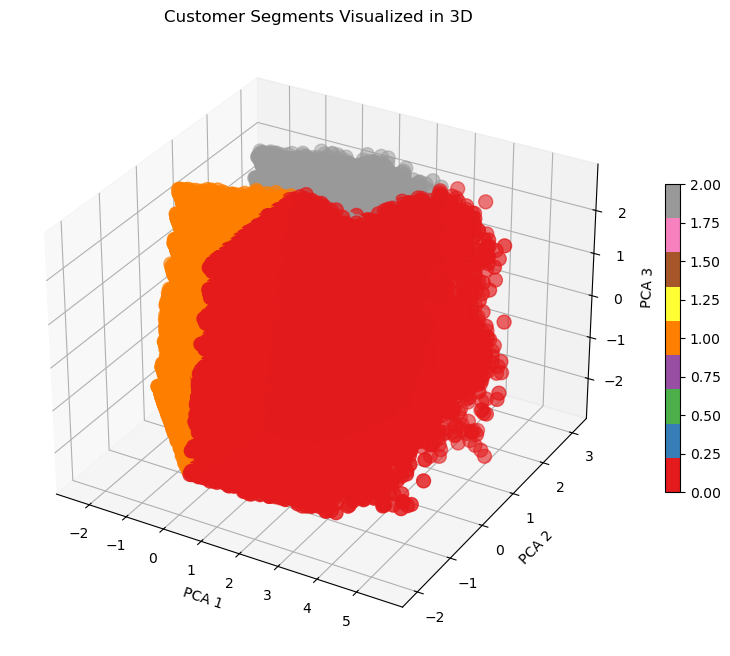

In [134]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
pca_features = pca.fit_transform(df2)
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with PCA components
scatter = ax.scatter(
    pca_features[:, 0], pca_features[:, 1], pca_features[:, 2],
    c=y_kmeans3, cmap='Set1', s=100
)

# Add labels and title
ax.set_title('Customer Segments Visualized in 3D')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Show color bar for clusters
plt.colorbar(scatter, ax=ax, shrink=0.5)
plt.show()